<a href="https://colab.research.google.com/github/mukund-2004/Traffic-Sign-Detection/blob/main/Traffic_Sign_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
!pip install tensorflow keras opencv-python matplotlib scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = '/content/drive/MyDrive/Traffic'
classes = os.listdir(DATA_PATH)
print("Number of classes:", len(classes))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of classes: 58


## Preprocessing

In [ ]:
IMG_SIZE = 32
images = []
labels = []

for idx, cls in enumerate(classes):
    folder = os.path.join(DATA_PATH, cls)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        images.append(img)
        labels.append(idx)

images = np.array(images)
labels = np.array(labels)

print("Dataset shape:", images.shape, labels.shape)


Dataset shape: (4170, 32, 32, 3) (4170,)


## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 3336
Testing samples: 834


## CNN Model Building

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 58)             │         7,482 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,914 (1.23 MB)

 Trainable params: 321,914 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

## CNN Model Training

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)


Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.1328 - loss: 3.7486 - val_accuracy: 0.3249 - val_loss: 2.7626
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.3176 - loss: 2.6839 - val_accuracy: 0.6213 - val_loss: 1.6921
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5293 - loss: 1.8269 - val_accuracy: 0.7260 - val_loss: 1.1728
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.6460 - loss: 1.2615 - val_accuracy: 0.7725 - val_loss: 0.9230
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.7068 - loss: 1.0237 - val_accuracy: 0.8159 - val_loss: 0.7009
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7624 - loss: 0.7875 - val_accuracy: 0.8623 - val_loss: 0.5622
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.7890 - loss: 0.6543 - val_accuracy: 0.8937 - val_loss: 0.4834
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8227 - loss: 0.5625 - val_accuracy: 0.9057 - v

## Model Evaluation

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Accuracy: 0.9292565947242206

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.75      0.86         8
           2       0.84      1.00      0.91        16
           3       0.96      1.00      0.98        52
           4       1.00      0.95      0.97        20
           5       1.00      0.87      0.93        39
           6       1.00      1.00      1.00        16
           7       0.83      1.00      0.91        30
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00         2
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00        26
          15       1.00      0.75      0.86         4
          16       0.90      1.00      0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Visualization

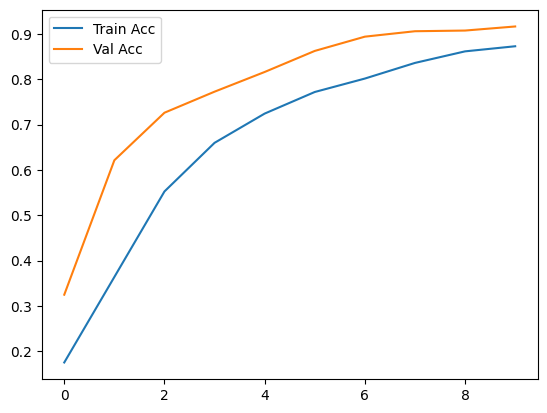

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()


## Testing the Model

In [ ]:
from google.colab import files
uploaded = files.upload()

for img_path in uploaded.keys():
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    img_expanded = np.expand_dims(img_resized, axis=0)

    pred = model.predict(img_expanded)
    class_id = np.argmax(pred)
    print(f"\nPredicted Traffic Sign for '{img_path}': {classes[class_id]}")


Saving 030_1_0017_1_j.png to 030_1_0017_1_j.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Predicted Traffic Sign for '030_1_0017_1_j.png': Mandatory Bicycle Lane
